In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("selected_5000_xgb.csv")
df_test = pd.read_csv("predicted_actives_xgb.csv")

df_test

,USER_ID,D001,D002,D003,D004,D005,D006,D007,D008,D009,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,S782-0170,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,4.85798,-0.699350,0.240000,2.69151
1,L036-0317,3,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.70044,-0.816815,0.473684,3.33826
2,D488-0147,2,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.72792,-0.793711,0.307692,3.70433
3,L834-0668,2,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,5.20945,-0.711333,0.428571,3.69451
4,L834-0607,2,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,5.20945,-0.711333,0.428571,3.92439
5,F089-0042,3,0,0,1,3,1,0,0,0,...,0,0,0,0,0,1,5.75489,-0.737017,0.461538,3.24734
6,L834-0672,2,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,5.32193,-0.671500,0.387097,4.68560
7,S976-0539,1,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,5.16993,-0.722401,0.214286,1.25155
8,S768-0276,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,4.95420,-0.352843,0.222222,2.78289
9,L834-0553,3,0,0,1,4,0,0,0,0,...,0,0,0,0,0,1,5.72792,-0.737017,0.461538,3.72130


In [2]:
#Removing low variance columns
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8*(1-.8)))

In [3]:
#Split dataset into training set and testing set
X = df_train
y = df_train['Activity']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [4]:
#Fit
_ = vt.fit(X_train)

In [5]:
#Get the mask
mask = vt.get_support()

In [6]:
#Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:,mask]

In [7]:
df_train_2 = X_train
df_train_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
1610,1,1,2,10,4,3,4,6,27.0,10,...,0,1,1,0,0,0,0,1,1,1.482600
5166,1,1,1,9,2,12,3,6,32.0,23,...,1,1,1,1,0,1,2,0,0,0.726000
4758,2,0,3,15,4,13,3,12,40.0,27,...,0,1,0,1,0,0,1,2,1,3.444140
3127,0,1,0,4,1,8,4,0,19.0,9,...,0,0,0,1,0,0,0,0,2,0.521110
3992,2,2,3,15,8,4,3,12,39.0,19,...,1,0,0,1,1,0,0,0,0,3.852690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,1,0,2,10,2,8,4,6,30.0,19,...,0,0,0,0,0,1,1,2,0,2.066680
1422,2,0,2,13,2,7,1,12,27.0,18,...,0,0,1,0,0,0,0,0,0,3.857530
3826,1,2,4,17,6,39,10,6,92.0,72,...,3,0,1,4,0,0,4,5,0,-0.530247
4855,1,0,2,9,2,10,3,6,31.0,16,...,0,0,0,0,0,1,1,0,0,0.914159


In [8]:
X = df_test.drop(['USER_ID'],axis=1)
y = df_test['USER_ID']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.001)

In [9]:
#Fit
_ = vt.fit(X_train)

In [10]:
#Get the mask
mask = vt.get_support()
#Subset the DataFrame
test_X_train = X_train.loc[:, mask]
test_X_test = X_test.loc[:,mask]

In [11]:
df_test_2 = test_X_train
df_test_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D773,D777
10,3,0,5,23,6,8,5,18,54,23,...,0,0,0,1,0,1,0,1,0,2.20629
0,1,0,1,7,2,7,1,6,29,23,...,0,1,1,1,0,0,0,0,0,2.69151
6,2,1,3,15,5,8,3,12,40,14,...,0,1,0,0,0,1,1,1,0,4.68560
2,2,1,4,20,6,10,8,12,53,24,...,0,0,1,0,2,0,0,2,0,3.70433
1,3,1,4,23,7,9,5,18,52,24,...,0,0,1,0,2,0,0,1,0,3.33826
4,2,1,3,15,5,5,3,12,37,14,...,0,1,0,0,0,1,1,1,0,3.92439
3,2,1,3,15,5,5,3,12,37,14,...,0,1,0,0,0,1,1,1,0,3.69451
7,1,0,3,11,4,9,5,6,36,22,...,1,0,1,1,0,0,1,1,0,1.25155
9,3,1,4,23,6,8,5,18,53,23,...,0,1,0,0,0,1,1,1,1,3.72130
5,3,1,3,24,8,7,6,18,54,20,...,2,2,0,0,0,1,1,1,1,3.24734


In [12]:
df_extract = df_train_2.iloc[:,0:357]
df_lev = df_train_2.iloc[:,0:357]
df_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
1610,1,1,2,10,4,3,4,6,27.0,10,...,0,1,1,0,0,0,0,1,1,1.482600
5166,1,1,1,9,2,12,3,6,32.0,23,...,1,1,1,1,0,1,2,0,0,0.726000
4758,2,0,3,15,4,13,3,12,40.0,27,...,0,1,0,1,0,0,1,2,1,3.444140
3127,0,1,0,4,1,8,4,0,19.0,9,...,0,0,0,1,0,0,0,0,2,0.521110
3992,2,2,3,15,8,4,3,12,39.0,19,...,1,0,0,1,1,0,0,0,0,3.852690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,1,0,2,10,2,8,4,6,30.0,19,...,0,0,0,0,0,1,1,2,0,2.066680
1422,2,0,2,13,2,7,1,12,27.0,18,...,0,0,1,0,0,0,0,0,0,3.857530
3826,1,2,4,17,6,39,10,6,92.0,72,...,3,0,1,4,0,0,4,5,0,-0.530247
4855,1,0,2,9,2,10,3,6,31.0,16,...,0,0,0,0,0,1,1,0,0,0.914159


In [13]:
df_test_extract = df_test_2.iloc[:,0:289]
df_test_lev = df_test_2.iloc[:,0:289]
df_test_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D773,D777
10,3,0,5,23,6,8,5,18,54,23,...,0,0,0,1,0,1,0,1,0,2.20629
0,1,0,1,7,2,7,1,6,29,23,...,0,1,1,1,0,0,0,0,0,2.69151
6,2,1,3,15,5,8,3,12,40,14,...,0,1,0,0,0,1,1,1,0,4.68560
2,2,1,4,20,6,10,8,12,53,24,...,0,0,1,0,2,0,0,2,0,3.70433
1,3,1,4,23,7,9,5,18,52,24,...,0,0,1,0,2,0,0,1,0,3.33826
4,2,1,3,15,5,5,3,12,37,14,...,0,1,0,0,0,1,1,1,0,3.92439
3,2,1,3,15,5,5,3,12,37,14,...,0,1,0,0,0,1,1,1,0,3.69451
7,1,0,3,11,4,9,5,6,36,22,...,1,0,1,1,0,0,1,1,0,1.25155
9,3,1,4,23,6,8,5,18,53,23,...,0,1,0,0,0,1,1,1,1,3.72130
5,3,1,3,24,8,7,6,18,54,20,...,2,2,0,0,0,1,1,1,1,3.24734


In [14]:
#Calculating the mean and standard deviations of train dataset
mean = df_extract.mean(axis=0)
std = df_extract.std(axis=0)
df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)
df_train_3

C:\Users\brian\AppData\Local\Temp\ipykernel_26028\3096718968.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_26028\3096718968.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
0,1.000000,1.000000,2.000000,10.000000,4.000000,3.000000,4.000000,6.000000,27.000000,10.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.482600
1,1.000000,1.000000,1.000000,9.000000,2.000000,12.000000,3.000000,6.000000,32.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.726000
2,2.000000,0.000000,3.000000,15.000000,4.000000,13.000000,3.000000,12.000000,40.000000,27.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,3.444140
3,0.000000,1.000000,0.000000,4.000000,1.000000,8.000000,4.000000,0.000000,19.000000,9.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.521110
4,2.000000,2.000000,3.000000,15.000000,8.000000,4.000000,3.000000,12.000000,39.000000,19.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.852690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,1.000000,2.000000,4.000000,17.000000,6.000000,39.000000,10.000000,6.000000,92.000000,72.000000,...,3.000000,0.000000,1.000000,4.000000,0.000000,0.000000,4.000000,5.000000,0.000000,-0.530247
4282,1.000000,0.000000,2.000000,9.000000,2.000000,10.000000,3.000000,6.000000,31.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.914159
4283,2.000000,1.000000,2.000000,15.000000,3.000000,9.000000,3.000000,12.000000,38.000000,23.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.782560
4284,1.362045,0.814426,2.137021,11.930205,3.735761,8.012372,3.728291,8.144725,34.332166,18.923903,...,0.405696,0.644258,0.409197,0.481793,0.261438,0.175303,0.393324,0.933007,0.332633,2.146850


In [15]:
#Calculating the mean and standard deviations for test dataset
test_mean = df_test_extract.mean(axis=0)
test_std = df_test_extract.std(axis=0)
df_test_3 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_test_3 = df_test_3.append(pd.DataFrame([std]),ignore_index=True)
df_test_3

C:\Users\brian\AppData\Local\Temp\ipykernel_26028\3597620245.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_3 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_26028\3597620245.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_3 = df_test_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D674,D689,D716,D721,D730,D733,D742,D745,D749,D770
0,3.000000,0.000000,5.000000,23.000000,6.000000,8.000000,5.000000,18.000000,54.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000,0.000000,1.000000,7.000000,2.000000,7.000000,1.000000,6.000000,29.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.000000,1.000000,3.000000,15.000000,5.000000,8.000000,3.000000,12.000000,40.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.000000,1.000000,4.000000,20.000000,6.000000,10.000000,8.000000,12.000000,53.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.000000,1.000000,4.000000,23.000000,7.000000,9.000000,5.000000,18.000000,52.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.000000,1.000000,3.000000,15.000000,5.000000,5.000000,3.000000,12.000000,37.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.000000,1.000000,3.000000,15.000000,5.000000,5.000000,3.000000,12.000000,37.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.000000,0.000000,3.000000,11.000000,4.000000,9.000000,5.000000,6.000000,36.000000,22.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.000000,1.000000,4.000000,23.000000,6.000000,8.000000,5.000000,18.000000,53.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.000000,1.000000,3.000000,24.000000,8.000000,7.000000,6.000000,18.000000,54.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Standardisation of descriptor values of train dataset
df_train_4 = df_lev.loc[:, :] - df_train_3.iloc[4284]
df_train_5 = df_train_4.abs()/ df_train_3.iloc[4284]
df_train_5['mean'] = df_train_5.mean(axis=1)
df_train_5['std'] = df_train_5.std(axis=1)
df_train_5['leverages'] = (df_train_5['mean'] + 1.28) * df_train_5['std']
df_train_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
1610,0.26581,0.227859,0.064118,0.161791,0.070732,0.625579,0.072878,0.263327,0.213565,0.471568,...,1.000000,1.000,1.000000,1.000000,0.071804,2.006316,0.309407,0.472892,0.368784,0.646438
5166,0.26581,0.227859,0.532059,0.245612,0.464634,0.497684,0.195342,0.263327,0.067929,0.215394,...,1.075581,1.000,4.704394,4.084866,1.000000,1.000000,0.661830,0.406578,0.615761,1.038528
4758,0.46838,1.000000,0.403823,0.257313,0.070732,0.622491,0.195342,0.473346,0.165088,0.426767,...,1.075581,1.000,1.000000,1.542433,1.143608,2.006316,0.604276,0.504012,0.877240,1.565007
3127,1.00000,0.227859,1.000000,0.664717,0.732317,0.001544,0.072878,1.000000,0.446583,0.524411,...,1.075581,1.000,1.000000,1.000000,1.000000,5.012632,0.757268,0.698689,0.641483,1.269295
3992,0.46838,1.455718,0.403823,0.257313,1.141465,0.500772,0.195342,0.473346,0.135961,0.004021,...,1.075581,2.825,1.000000,1.000000,1.000000,1.000000,0.794578,0.467340,0.603301,1.054172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,0.26581,1.000000,0.064118,0.161791,0.464634,0.001544,0.072878,0.263327,0.126184,0.004021,...,1.000000,1.000,4.704394,1.542433,1.143608,1.000000,0.037343,0.435131,0.637255,1.092975
1422,0.46838,1.000000,0.064118,0.089671,0.464634,0.126351,0.731781,0.473346,0.213565,0.048822,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,0.796833,0.518490,0.489449,0.880270
3826,0.26581,1.455718,0.871764,0.424955,0.606098,3.867473,1.682194,0.263327,1.679703,2.804712,...,7.302326,1.000,1.000000,9.169733,4.359019,1.000000,1.246988,9.108152,105.908034,1100.188792
4855,0.26581,1.000000,0.064118,0.245612,0.464634,0.248070,0.195342,0.263327,0.097057,0.154508,...,1.000000,1.000,4.704394,1.542433,1.000000,1.000000,0.574186,0.710614,3.023766,6.019152


In [25]:
#Standardisation of descriptors values of test dataset
df_test_4 = df_test_lev.loc[:, :] - df_test_3.iloc[10]
df_test_5 = df_test_4.abs()/ df_test_3.iloc[10]
df_test_5['mean'] = df_test_5.mean(axis=1)
df_test_5['std'] = df_test_5.std(axis=1)
df_test_5['leverages'] = (df_test_5['mean'] + 1.28) * df_test_5['std']
df_test_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D761,D762,D763,D765,D770,D773,D777,mean,std,leverages
10,1.202571,1.000000,1.339705,0.927880,0.606098,0.001544,0.341097,1.210019,0.572869,0.215394,...,1.00,4.704394,1.000000,0.071804,NaN,NaN,0.027687,3.482552,29.703254,141.463279
0,0.265810,1.000000,0.532059,0.413254,0.464634,0.126351,0.731781,0.263327,0.155311,0.215394,...,1.00,1.000000,1.000000,1.000000,NaN,NaN,0.253702,17.767978,283.091747,5392.325290
6,0.468380,0.227859,0.403823,0.257313,0.338415,0.001544,0.195342,0.473346,0.165088,0.260195,...,1.00,4.704394,1.542433,0.071804,NaN,NaN,1.182547,0.635552,2.065976,3.957484
2,0.468380,0.227859,0.871764,0.676417,0.606098,0.248070,1.145755,0.473346,0.543742,0.268237,...,6.65,1.000000,1.000000,1.143608,NaN,NaN,0.725473,0.858980,1.001468,2.142120
1,1.202571,0.227859,0.871764,0.927880,0.873782,0.123263,0.341097,1.210019,0.514615,0.268237,...,6.65,1.000000,1.000000,0.071804,NaN,NaN,0.554958,0.838451,1.127357,2.388252
4,0.468380,0.227859,0.403823,0.257313,0.338415,0.375965,0.195342,0.473346,0.077707,0.260195,...,1.00,4.704394,1.542433,0.071804,NaN,NaN,0.827976,0.587075,2.623628,4.898509
3,0.468380,0.227859,0.403823,0.257313,0.338415,0.375965,0.195342,0.473346,0.077707,0.260195,...,1.00,4.704394,1.542433,0.071804,NaN,NaN,0.720898,0.397708,0.778324,1.305800
7,0.265810,1.000000,0.403823,0.077971,0.070732,0.123263,0.341097,0.263327,0.048579,0.162551,...,1.00,1.000000,1.542433,0.071804,NaN,NaN,0.417029,0.343402,0.562847,0.913728
9,1.202571,0.227859,0.871764,0.927880,0.606098,0.001544,0.341097,1.210019,0.543742,0.215394,...,1.00,4.704394,1.542433,0.071804,NaN,NaN,0.733377,0.872042,0.889577,1.914406
5,1.202571,0.227859,0.403823,1.011700,1.141465,0.126351,0.609316,1.210019,0.572869,0.056864,...,1.00,4.704394,1.542433,0.071804,NaN,NaN,0.512607,2.207578,17.242093,60.133138


In [26]:
#Max values of descriptors
maxValues = df_train_5[df_train_5.max(axis = 1) > 3]
maxValues

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
5166,0.26581,0.227859,0.532059,0.245612,0.464634,0.497684,0.195342,0.263327,0.067929,0.215394,...,1.075581,1.000,4.704394,4.084866,1.000000,1.000000,0.661830,0.406578,0.615761,1.038528
4758,0.46838,1.000000,0.403823,0.257313,0.070732,0.622491,0.195342,0.473346,0.165088,0.426767,...,1.075581,1.000,1.000000,1.542433,1.143608,2.006316,0.604276,0.504012,0.877240,1.565007
3127,1.00000,0.227859,1.000000,0.664717,0.732317,0.001544,0.072878,1.000000,0.446583,0.524411,...,1.075581,1.000,1.000000,1.000000,1.000000,5.012632,0.757268,0.698689,0.641483,1.269295
3992,0.46838,1.455718,0.403823,0.257313,1.141465,0.500772,0.195342,0.473346,0.135961,0.004021,...,1.075581,2.825,1.000000,1.000000,1.000000,1.000000,0.794578,0.467340,0.603301,1.054172
4494,0.46838,1.000000,0.871764,0.257313,0.070732,0.248070,0.195342,0.473346,0.339851,0.743826,...,1.075581,2.825,1.000000,1.542433,1.000000,1.000000,0.576356,0.668048,0.506045,0.985800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,0.26581,1.000000,0.064118,0.161791,0.464634,0.001544,0.072878,0.263327,0.126184,0.004021,...,1.000000,1.000,4.704394,1.542433,1.143608,1.000000,0.037343,0.435131,0.637255,1.092975
1422,0.46838,1.000000,0.064118,0.089671,0.464634,0.126351,0.731781,0.473346,0.213565,0.048822,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,0.796833,0.518490,0.489449,0.880270
3826,0.26581,1.455718,0.871764,0.424955,0.606098,3.867473,1.682194,0.263327,1.679703,2.804712,...,7.302326,1.000,1.000000,9.169733,4.359019,1.000000,1.246988,9.108152,105.908034,1100.188792
4855,0.26581,1.000000,0.064118,0.245612,0.464634,0.248070,0.195342,0.263327,0.097057,0.154508,...,1.000000,1.000,4.704394,1.542433,1.000000,1.000000,0.574186,0.710614,3.023766,6.019152


In [27]:
df_train_6 = df_train_5.loc[df_train_5['leverages'] > 3]
df_train_6

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
4477,0.468380,0.227859,0.064118,0.089671,0.196951,0.001544,0.731781,0.473346,0.038802,0.056864,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,0.724564,0.492974,1.817216,3.221876
4119,0.468380,1.000000,0.064118,0.089671,0.464634,0.497684,0.731781,0.473346,0.067929,0.004021,...,1.075581,1.000,1.000000,1.000000,1.000000,1.000000,1.412004,0.642061,3.208958,6.167811
4545,1.202571,2.683577,0.403823,0.927880,1.409148,1.371333,0.341097,1.210019,0.951523,0.743826,...,5.226744,1.000,1.000000,4.084866,1.000000,1.000000,1.641056,2.583957,11.280018,43.585502
5126,1.936761,0.227859,1.807646,1.346984,2.479880,0.001544,0.072878,1.946693,0.805887,0.373924,...,1.000000,2.825,4.704394,1.000000,2.215412,1.000000,1.088642,1.412833,3.845294,10.354735
3612,0.265810,2.683577,0.532059,0.329433,1.141465,0.126351,0.463561,0.263327,0.097057,0.056864,...,1.000000,2.825,1.000000,1.000000,1.000000,1.000000,0.078832,0.680734,3.353554,6.575429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,0.265810,3.911436,0.532059,0.077971,1.141465,0.500772,0.341097,0.263327,0.077707,0.048822,...,1.075581,1.000,1.000000,1.542433,1.143608,1.000000,0.928258,0.719495,2.745640,5.489894
5207,1.000000,0.227859,1.000000,0.664717,0.196951,0.251158,0.072878,1.000000,0.300947,0.048822,...,1.000000,1.000,1.000000,1.000000,1.000000,2.006316,0.007383,1.439909,12.760582,34.707618
831,0.265810,0.227859,0.532059,0.497075,0.070732,0.750386,1.000000,0.263327,0.475710,0.418725,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,0.736349,1.094520,5.423992,12.879380
3826,0.265810,1.455718,0.871764,0.424955,0.606098,3.867473,1.682194,0.263327,1.679703,2.804712,...,7.302326,1.000,1.000000,9.169733,4.359019,1.000000,1.246988,9.108152,105.908034,1100.188792


In [28]:
#Calculate the Applicability Domain of a new test compound
new_test = df_test_5.iloc[[2]]
new_test.index
s_new = new_test['leverages']
s_new = round(s_new, 3)
print(s_new)
if (s_new > 3).any():
  print('outlier')
elif (s_new < 3).any():
  print('not outlier')

6    3.957
Name: leverages, dtype: float64
outlier


c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


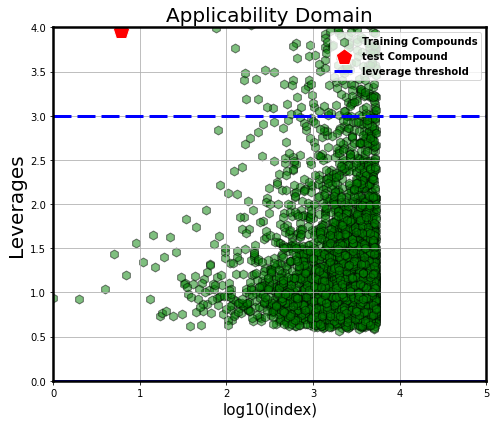

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 6))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
legend_properties = {'weight':'bold'}

plt.scatter(np.log10(df_train_5.index), df_train_5['leverages'], c='green', s=80, alpha=0.5, label="Training Compounds", marker="h", edgecolors='black')
#plt.scatter(np.log10(X_test.index), X_test['leverages'], c='red', s=80, alpha=0.5, label="Test Compounds",  marker="*", edgecolors='black')

plt.scatter(np.log10(new_test.index), new_test['leverages'], c='red', s=300, label="test Compound", marker="p", edgecolors='white')

plt.axhline(y = 3, color = 'blue', linestyle = '-', linewidth=3 , dashes=[6, 2], label= 'leverage threshold' ) #Note threshold is x=3 
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth=3)
plt.title("Applicability Domain", fontsize=20)
plt.xlabel("log10(index)", fontsize=15)
plt.ylabel("Leverages", fontsize=20)
plt.legend(loc="upper right", prop=legend_properties)
plt.ylim(0, 4)
plt.xlim(0, 5)
plt.grid()
fig.savefig('xgb_AD.png')